**Rights Reserved by Sarthak Pan**

In [ ]:
from collections import deque
import heapq
import numpy as  np

In [ ]:
class Problem:
    def __init__(self, initial, goal=None):
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        raise NotImplementedError

    def result(self, state, action):
        raise NotImplementedError

    def goal_test(self, state):
        if isinstance(self.goal, list):
            return is_in(state, self.goal)
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        return c + 1

    def value(self, state):
        raise NotImplementedError

In [ ]:
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __repr__(self):
        return "<Node {}>".format(self.state)

    def __lt__(self, node):
        return self.state < node.state
    
    def __len__(self): 
        return 0 if self.parent is None else (1 + len(self.parent))

    def expand(self, problem):
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        next_state = problem.result(self.state, action)
        next_node = Node(next_state, self, action, problem.path_cost(self.path_cost, self.state, action, next_state))
        return next_node

    def solution(self):
        return [node.action for node in self.path()[:]]

    def path(self):
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))

    def __eq__(self, other):
        return isinstance(other, Node) and self.state == other.state

    def __hash__(self):
        return hash(self.state)

In [ ]:
class Graph:
    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed
        if not directed:
            self.make_undirected()

    def make_undirected(self):
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.connect1(b, a, dist)

    def connect(self, A, B, distance=1):
        self.connect1(A, B, distance)
        if not self.directed:
            self.connect1(B, A, distance)

    def connect1(self, A, B, distance):
        self.graph_dict.setdefault(A, {})[B] = distance

    def get(self, a, b=None):
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)

    def nodes(self):
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)

In [ ]:
class GraphProblem(Problem):

    def __init__(self, initial, goal, graph):
        super().__init__(initial, goal)
        self.graph = graph

    def actions(self, A):
        return list(self.graph.get(A).keys())

    def result(self, state, action):
        return action

    def path_cost(self, cost_so_far, A, action, B):
        return cost_so_far + (self.graph.get(A, B) or np.inf)

    def find_min_edge(self):
        m = np.inf
        for d in self.graph.graph_dict.values():
            local_min = min(d.values())
            m = min(m, local_min)

        return m

In [ ]:
class PriorityQueue:
    """A queue in which the item with minimum f(item) is always popped first."""

    def __init__(self, items=(), key=lambda x: x): 
        self.key = key
        self.items = [] # a heap of (score, item) pairs
        for item in items:
            self.add(item)
         
    def add(self, item):
        """Add item to the queuez."""
        pair = (self.key(item), item)
        heapq.heappush(self.items, pair)

    def pop(self):
        """Pop and return the item with min f(item) value."""
        return heapq.heappop(self.items)[1]
    
    def top(self): return self.items[0][1]

    def __len__(self): return len(self.items)

In [ ]:
def is_cycle(node, k=30):
    "Does this node form a cycle of length k or less?"
    def find_cycle(ancestor, k):
        return (ancestor is not None and k > 0 and
                (ancestor.state == node.state or find_cycle(ancestor.parent, k - 1)))
    return find_cycle(node.parent, k)

In [ ]:
def UndirectedGraph(graph_dict=None):
    return Graph(graph_dict=graph_dict, directed=False)

In [ ]:
def w_input():
    g = {}
    while(True):
        p = input("Enter Parrent (type exit to end) ")
        if p == 'exit':
            break
        else:
            print("Enter child nodes of " + p)
            c = input().split(' ')
            g[p] = dict(zip(c[0::2], map(int,c[1::2]))) 
    return g

In [ ]:
def unw_input():
    g = {}
    while(True):
        p = input("Enter Parrent (type exit to end) ")
        if p == 'exit':
            break
        else:
            print("Enter child nodes of " + p)
            c = input().split(' ')
            g[p]=dict.fromkeys(c , 1)
    return g

Input

In [ ]:
dir = int(input("Weighted-0/Unweighted-1? "))
if dir == 1:
    my_graph = UndirectedGraph(unw_input())
    start, goal = input("Enter start, goal ").split(' ')
    my_graph_problem = GraphProblem(start, goal, my_graph)
elif dir == 0:
    my_graph = UndirectedGraph(w_input())
    start, goal = input("Enter start, goal ").split(' ')
    my_graph_problem = GraphProblem(start, goal, my_graph)

Weighted-0/Unweighted-1? 0
Enter Parrent (type exit to end) a
Enter child nodes of a
b 4 c 3
Enter Parrent (type exit to end) b
Enter child nodes of b
f 5 e 12
Enter Parrent (type exit to end) c
Enter child nodes of c
d 7 e 10
Enter Parrent (type exit to end) d
Enter child nodes of d
e 2
Enter Parrent (type exit to end) e
Enter child nodes of e
z 5
Enter Parrent (type exit to end) f
Enter child nodes of f
z 16
Enter Parrent (type exit to end) exit
Enter start, goala z


In [ ]:
## Quick Execution Only
sample_graph = {
    1 : {2:1,3:1,4:1},
    2:{5:1,6:1},
    3:{7:1},
    4:{8:1},
    8:{9:1,10:1},
    10:{11:1,12:1,13:1}
}
my_graph = UndirectedGraph(sample_graph)
my_graph_problem = GraphProblem(1, 12, my_graph)

In [ ]:
## Quick Execution Only Weighted Graph
sample_graph = {
    'a' : {'b':4,'c':3},
    'b':{'f':5,'e':12},
    'c':{'d':7,'e':10},
    'd':{'e':2},
    'e':{'z':5},
    'f':{'z':16}
}
my_graph = UndirectedGraph(sample_graph)
my_graph_problem = GraphProblem('a', 'z', my_graph)

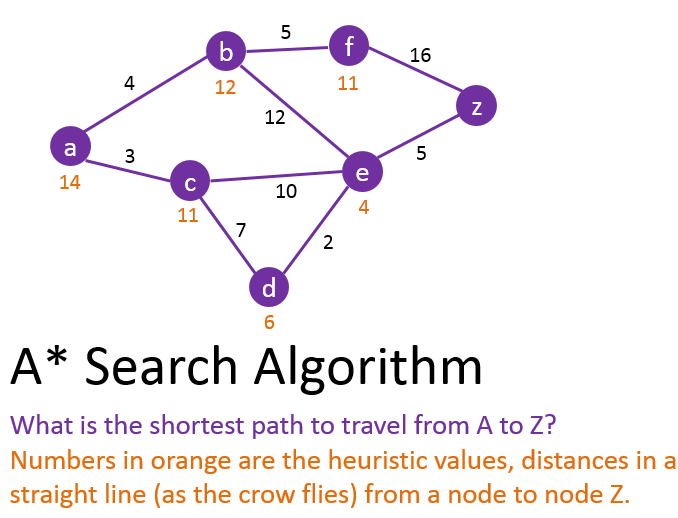

Uninformed Search

In [ ]:
def depth_first_graph_search(problem):
    order = {k : 0 for k in problem.graph.nodes()}
    frontier = [(Node(problem.initial))]  # Stack
    
    order[Node(problem.initial).state] = 1
    count = 2

    explored = set()
    while frontier:
        node = frontier.pop()
        if order[node.state] == 0:
            order[node.state] = count
            count+=1

        if problem.goal_test(node.state):
            if order[node.state] == 0:
                order[node.state] = count
                count+=1
            return (order,[problem.initial]+node.solution())
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)[::-1]
                        if child.state not in explored and child not in frontier)

        if order[node.state] == 0:
            order[node.state] = count
            count+=1
    return None, None

In [ ]:
order, path = depth_first_graph_search(my_graph_problem)
print("order: ",[each[0] for each in sorted([x for x in order.items() if x[1]], key=lambda kv: kv[1])])
print("path: ",path)

order:  ['a', 'b', 'f', 'z']
path:  ['a', 'b', 'f', 'z']


In [ ]:
def breadth_first_graph_search(problem):
    order = {k : 0 for k in problem.graph.nodes()}
    node = Node(problem.initial)
    order[node.state] = 1
    count = 2

    if problem.goal_test(node.state):
        return (order, node)
    frontier = deque([node])

    explored = set()
    while frontier:
        node = frontier.popleft()
        if order[node.state] == 0:
            order[node.state] = count
            count+=1
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    if order[child.state] == 0:
                        order[child.state] = count
                        count+=1
                    return (order, [problem.initial]+child.solution())
                frontier.append(child)
                if order[child.state] == 0:
                    order[child.state] = count
                    count+=1
        if order[node.state] == 0:
            order[node.state] = count
            count+=1
    return None

In [ ]:
order, path = breadth_first_graph_search(my_graph_problem)
print("order: ",[each[0] for each in sorted([x for x in order.items() if x[1]], key=lambda kv: kv[1])])
print("path: ",path)

order:  ['a', 'b', 'c', 'f', 'e', 'd', 'z']
path:  ['a', 'b', 'f', 'z']


In [ ]:
def depth_limited_search(problem, limit=10):
    order = {k : 0 for k in problem.graph.nodes()}
    frontier = [(Node(problem.initial))]  # Stack
    
    order[Node(problem.initial).state] = 1
    count = 2

    explored = set()
    while frontier:
        node = frontier.pop()
        if order[node.state] == 0:
            order[node.state] = count
            count+=1

        if problem.goal_test(node.state):
            if order[node.state] == 0:
                order[node.state] = count
                count+=1
            return (order,[problem.initial]+node.solution())

        if len(node) >= limit:
            return None, None

        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)[::-1]
                        if child.state not in explored and child not in frontier)

        if order[node.state] == 0:
                order[node.state] = count
                count+=1
    return None, None

In [ ]:
order, path = depth_limited_search(my_graph_problem,limit=3)
if path == None:
    print("Goal not reached")
else:
    print("order: ",[each[0] for each in sorted([x for x in order.items() if x[1]], key=lambda kv: kv[1])])
    print("path: ",path)

order:  ['a', 'b', 'f', 'z']
path:  ['a', 'b', 'f', 'z']


In [ ]:
def iterative_deepening_search(problem,depth):
    for limit in range(1, depth+1):
        order, path = depth_limited_search(problem, limit)
        if path == None:
            print("Goal not reached")
        else:
            print("order: ",[each[0] for each in sorted([x for x in order.items() if x[1]], key=lambda kv: kv[1])])
            print("path: ",path)

In [ ]:
iterative_deepening_search(my_graph_problem,depth=3) #show all itr

Goal not reached
Goal not reached
order:  ['a', 'b', 'f', 'z']
path:  ['a', 'b', 'f', 'z']


Informed Search

In [ ]:
def best_first_search(problem, f):
    "Search nodes with minimum f(node) value first."
    order = {k : 0 for k in problem.graph.nodes()}
    node = Node(problem.initial)
    order[Node(problem.initial).state] = 1
    count = 2
    frontier = PriorityQueue([node], key=f)
    reached = {problem.initial: node}
    while frontier:
        node = frontier.pop()
        if order[node.state] == 0:
            order[node.state] = count
            count+=1
        if problem.goal_test(node.state):
            if order[node.state] == 0:
                    order[node.state] = count
                    count+=1
            return (order,[problem.initial]+node.solution())
        for child in node.expand(problem):
            s = child.state
            if s not in reached or child.path_cost < reached[s].path_cost:
                reached[s] = child
                frontier.add(child)
        if order[node.state] == 0:
                order[node.state] = count
                count+=1
    return None, None


In [ ]:
def g(n): 
    return n.path_cost
def h(n):
    index = n.state
    H = {'a':14,'b':12,'c':11,'d':6,'e':4,'f':11,'z':0}
    return H[index]

In [ ]:
def greedy_bfs(problem, h=None):
    """Search nodes with minimum h(n)."""
    return best_first_search(problem, f=h)

In [ ]:
order, path = greedy_bfs(my_graph_problem,h)
if path == None:
    print("Goal not reached") 
else:
    print("order: ",[each[0] for each in sorted([x for x in order.items() if x[1]], key=lambda kv: kv[1])])
    print("path: ",path)

order:  ['a', 'c', 'e', 'z']
path:  ['a', 'c', 'e', 'z']


In [ ]:
def astar_search(problem, h,g):
    """Search nodes with minimum f(n) = g(n) + h(n)."""
    return best_first_search(problem, f=lambda n: g(n) + h(n))

In [ ]:
order, path = astar_search(my_graph_problem,h,g) #print cost
if path == None:
    print("Goal not reached")
else:
    print("order: ",[each[0] for each in sorted([x for x in order.items() if x[1]], key=lambda kv: kv[1])])
    print("path: ",path)

order:  ['a', 'c', 'b', 'd', 'e', 'z']
path:  ['a', 'c', 'd', 'e', 'z']


In [ ]:
def uniform_cost_search(problem,g):
    "Search nodes with minimum path cost first."
    return best_first_search(problem, f=g)

In [ ]:
order, path = uniform_cost_search(my_graph_problem,g)
if path == None:
    print("Goal not reached")
else:
    print("order: ",[each[0] for each in sorted([x for x in order.items() if x[1]], key=lambda kv: kv[1])])
    print("path: ",path)

order:  ['a', 'c', 'b', 'f', 'd', 'e', 'z']
path:  ['a', 'c', 'd', 'e', 'z']
